# Colinton, Edinburgh, Scotland

In [1]:
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)
from tools import *
from graph_route import plot_graph_route
import matplotlib.pyplot as plt
from network import Network
from network.algorithms import hierholzer

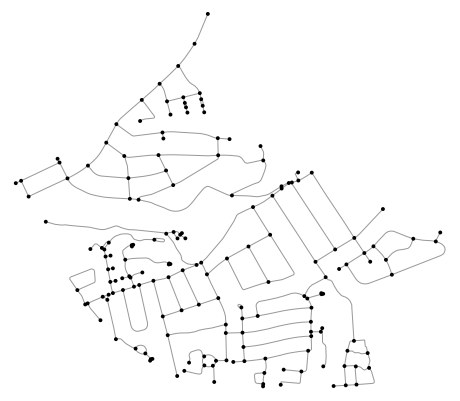

In [2]:
location = 'Colinton, Edinburgh, Scotland'
org_graph = ox.graph_from_place(location, network_type='drive')
graph = ox.utils_graph.get_undirected(org_graph)
fig, ax = ox.plot_graph(graph, node_zorder=2, node_color='k', bgcolor='w')

In [3]:
odd_degree_nodes = get_odd_degree_nodes(graph)
pair_weights = get_shortest_distance_for_odd_degrees(graph, odd_degree_nodes)
matched_edges_with_weights = max_matching(pair_weights)
single_edges = get_single_edges(graph)

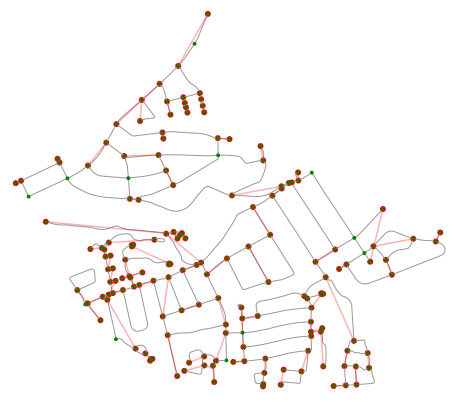

In [4]:
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black', frameon=False)
for v, u, w in matched_edges_with_weights:
    x = graph.nodes[v]["x"], graph.nodes[u]["x"]
    y = graph.nodes[v]["y"], graph.nodes[u]["y"]
    ax.plot(x, y, c='red', alpha=0.3)
    ax.scatter(x, y, c='red', edgecolor="none")

fig, ax = ox.plot_graph(graph, node_zorder=2, node_color='g', bgcolor='k', ax=ax)

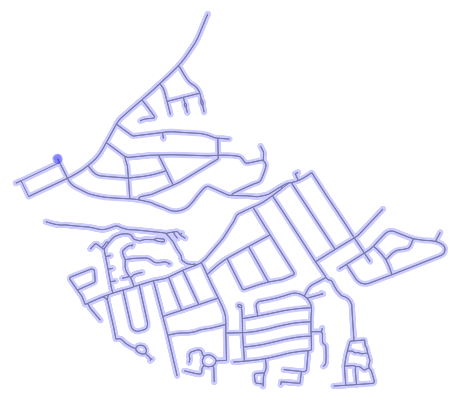

In [5]:
edges = map_osmnx_edges2integers(graph, single_edges + matched_edges_with_weights)

network = Network(len(graph.nodes), edges, weighted=True)
eulerian_path = hierholzer(network)
converted_eulerian_path = convert_integer_path2osmnx_nodes(eulerian_path, graph.nodes())
double_edge_heap = get_double_edge_heap(graph)

final_path = convert_path(graph, converted_eulerian_path, double_edge_heap)
fig, ax = plot_graph_route(org_graph, final_path, route_linewidth=6, node_size=0, bgcolor='w', route_alpha=0.2, route_color='b')

In [6]:
for i, e in enumerate(final_path, start=1):
    fig, ax = plot_graph_route(org_graph, final_path[:i], route_linewidth=6, node_size=0, bgcolor='w', route_alpha=0.2)
    ax.set_title(location)
    fig.savefig(f'img_{i}.png', dpi=120, bbox_inches='tight')

![](colinton.gif)